In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
import os
import re
import email
from html.parser import HTMLParser
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import pandas as pd
import string
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import scipy
from sklearn import metrics as mt
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
%matplotlib inline

In [3]:
easyham=[]
targets_easyham=[]
easy_ham = os.listdir('C:/Users/zzaik/OneDrive/SMU work/quantifying the world/case study/case study 3/easy_ham/')
for i in easy_ham:
    with open(os.path.join('C:/Users/zzaik/OneDrive/SMU work/quantifying the world/case study/case study 3/easy_ham/',i), 'r') as f:
        try:
            x = email.message_from_file(f)
        except:
            print(f'msg {i} not read')
    mailType = x.get_content_type()
    textType = x.get_content_charset()
    if mailType == 'text/plain':
        easyham.append(x.get_payload())
        targets_easyham.append(0)
    elif mailType == 'text/html':
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace('\n', ' ')
        easyham.append(tmp)
        targets_easyham.append(0)
    elif x.is_multipart():
         for j in x.walk():
            mailType = j.get_content_type()
            textType = j.get_content_charset()
            if mailType == "text/plain":
                easyham.append(j.get_payload())
                targets_easyham.append(0)
            elif mailType == "text/html":
                tmp = BeautifulSoup(j.get_payload(), 'html.parser')
                tmp = tmp.text.replace("\n"," ")
                easyham.append(tmp)
                targets_easyham.append(0)
    else:
        print(f'msg {i} not parsed')
        print(x.get_content_type())
        print(textType)

In [4]:
easyham2=[]
targets_easyham2=[]
easy_ham2 = os.listdir('C:/Users/zzaik/OneDrive/SMU work/quantifying the world/case study/case study 3/easy_ham_2/')
for i in easy_ham2:
    with open(os.path.join('C:/Users/zzaik/OneDrive/SMU work/quantifying the world/case study/case study 3/easy_ham_2/',i), 'r') as f:
        try:
            x = email.message_from_file(f)
        except:
            print(f'msg {i} not read')
    mailType = x.get_content_type()
    textType = x.get_content_charset()
    if mailType == 'text/plain':
        easyham2.append(x.get_payload())
        targets_easyham2.append(0)
    elif mailType == 'text/html':
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace('\n', ' ')
        easyham2.append(tmp)
        targets_easyham2.append(0)
    elif x.is_multipart():
         for j in x.walk():
            mailType = j.get_content_type()
            textType = j.get_content_charset()
            if mailType == "text/plain":
                easyham2.append(j.get_payload())
                targets_easyham2.append(0)
            elif mailType == "text/html":
                tmp = BeautifulSoup(j.get_payload(), 'html.parser')
                tmp = tmp.text.replace("\n"," ")
                easyham2.append(tmp)
                targets_easyham2.append(0)
    else:
        print(f'msg {i} not parsed')
        print(x.get_content_type())
        print(textType)

In [5]:
hardham=[]
targets_hardham=[]
hard_ham = os.listdir('C:/Users/zzaik/OneDrive/SMU work/quantifying the world/case study/case study 3/hard_ham/')
for i in hard_ham:
    with open(os.path.join('C:/Users/zzaik/OneDrive/SMU work/quantifying the world/case study/case study 3/hard_ham/',i), 'r') as f:
        try:
            x = email.message_from_file(f)
        except:
            print(f'msg {i} not read')
    mailType = x.get_content_type()
    textType = x.get_content_charset()
    if mailType == 'text/plain':
        hardham.append(x.get_payload())
        targets_hardham.append(0)
    elif mailType == 'text/html':
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace('\n', ' ')
        hardham.append(tmp)
        targets_hardham.append(0)
    elif x.is_multipart():
         for j in x.walk():
            mailType = j.get_content_type()
            textType = j.get_content_charset()
            if mailType == "text/plain":
                hardham.append(j.get_payload())
                targets_hardham.append(0)
            elif mailType == "text/html":
                tmp = BeautifulSoup(j.get_payload(), 'html.parser')
                tmp = tmp.text.replace("\n"," ")
                hardham.append(tmp)
                targets_hardham.append(0)
    else:
        print(f'msg {i} not parsed')
        print(x.get_content_type())
        print(textType)

In [6]:
targets_ham = targets_hardham + targets_easyham + targets_easyham2
ham = easyham + easyham2+ hardham

In [7]:
mail_df = pd.DataFrame(zip(ham, targets_ham), columns=['content', 'classify'])
mail_df.head()

,content,classify
0,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
1,"Martin A posted:\nTassos Papadopoulos, the Gre...",0
2,Man Threatens Explosion In Moscow \n\nThursday...,0
3,Klez: The Virus That Won't Die\n \nAlready the...,0
4,"> in adding cream to spaghetti carbonara, whi...",0


In [8]:
spamlist=[]
targets_spam=[]
spam = os.listdir('C:/Users/zzaik/OneDrive/SMU work/quantifying the world/case study/case study 3/spam/')
for i in spam:
    with open(os.path.join('C:/Users/zzaik/OneDrive/SMU work/quantifying the world/case study/case study 3/spam/',i), 'r', encoding="ISO-8859-1") as f:
        try:
            x = email.message_from_file(f)
        except:
            print(f'msg {i} not read')
    mailType = x.get_content_type()
    textType = x.get_content_charset()
    if mailType == 'text/plain':
        spamlist.append(x.get_payload())
        targets_spam.append(1)
    elif mailType == 'text/html':
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace('\n', ' ')
        spamlist.append(tmp)
        targets_spam.append(1)
    elif mailType == "multipart/alternative":
        for i in x.walk():
            if i.get_content_type() == 'text/plain':
                spamlist.append(i.get_payload())
                targets_spam.append(1)
            elif i.get_content_type() == 'text/html':
                tmp = BeautifulSoup(i.get_payload(), 'html.parser')
                tmp = tmp.text.replace('\n', ' ')
                spamlist.append(tmp)
                targets_spam.append(1)
    elif x.is_multipart():
         for j in x.walk():
            mailType = j.get_content_type()
            textType = j.get_content_charset()
            if mailType == "text/plain":
                spamlist.append(j.get_payload())
                targets_spam.append(1)
            elif mailType == "text/html":
                tmp = BeautifulSoup(j.get_payload(), 'html.parser')
                tmp = tmp.text.replace("\n"," ")
                spamlist.append(tmp)
                targets_spam.append(1)
    else:
        print(f'msg {i} not parsed')
        print(x.get_content_type())
        print(textType)

In [9]:
spamlist_2=[]
targets_spam_2=[]
spam_2 = os.listdir('C:/Users/zzaik/OneDrive/SMU work/quantifying the world/case study/case study 3/spam_2/')
for i in spam_2:
    with open(os.path.join('C:/Users/zzaik/OneDrive/SMU work/quantifying the world/case study/case study 3/spam_2/',i), 'r', encoding="ISO-8859-1") as f:
        try:
            x = email.message_from_file(f)
        except:
            print(f'msg {i} not read')
    mailType = x.get_content_type()
    textType = x.get_content_charset()
    if mailType == 'text/plain':
        spamlist_2.append(x.get_payload())
        targets_spam_2.append(1)
    elif mailType == 'text/plain charset=us-ascii':
        spamlist_2.append(x.get_payload())
        targets_spam_2.append(1)
    elif mailType == 'text/html':
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace('\n', ' ')
        spamlist_2.append(tmp)
        targets_spam_2.append(1)
    elif mailType == "multipart/alternative":
        for i in x.walk():
            if i.get_content_type() == 'text/plain':
                spamlist_2.append(i.get_payload())
                targets_spam_2.append(1)
            elif i.get_content_type() == 'text/html':
                tmp = BeautifulSoup(i.get_payload(), 'html.parser')
                tmp = tmp.text.replace('\n', ' ')
                spamlist_2.append(tmp)
                targets_spam_2.append(1)
    elif x.is_multipart():
         for j in x.walk():
            mailType = j.get_content_type()
            textType = j.get_content_charset()
            if mailType == "text/plain":
                spamlist_2.append(j.get_payload())
                targets_spam_2.append(1)
            elif mailType == "text/html":
                tmp = BeautifulSoup(j.get_payload(), 'html.parser')
                tmp = tmp.text.replace("\n"," ")
                spamlist_2.append(tmp)
                targets_spam_2.append(1)
    else:
        print(f'msg {i} not parsed')
        print(x.get_content_type())
        print(textType)

In [10]:
spam_list = spamlist_2 + spamlist
targets_spam_list = targets_spam_2 + targets_spam

In [11]:
spam_df = pd.DataFrame(zip(spam_list, targets_spam_list), columns=['content', 'classify'])
spam_df.head()

,content,classify
0,Greetings!\n\nYou are receiving this letter be...,1
1,"The Need For Safety Is Real In 2002, You...",1
2,"*****Bonus Fat Absorbers As Seen On TV, I...",1
3,"*****Bonus Fat Absorbers As Seen On TV, I...",1
4,"Government Grants E-Book 2002 edition, Just ...",1


In [12]:
mail_all = pd.concat([mail_df, spam_df], axis=0)

In [13]:
mail_all.shape

(9721, 2)

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zzaik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zzaik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [15]:
#Change letters to lowercase
#Remove punctuation 
#Remove stopwords
#Remove digits
#Use stemmer and Lemmatization
#stemmer = SnowballStemmer('english')
#lemmatizer = WordNetLemmatizer()
#def clean_text(text):
    #text = text.lower()
    #text = [x for x in text if x not in string.punctuation]
    #text = [i for i in text if not i.isdigit()]
    #text = ''.join(text)
    #words = [y for y in text.split() if y not in stopwords.words('english')]
    #words= [lemmatizer.lemmatize(j) for j in words]
    #clean_words = ' '.join([stemmer.stem(z) for z in words])
    #return clean_words

In [16]:
#mail_all['content'].head().apply(clean_text)

0    date wed 21 aug 2002 105446 0500 chris garrigu...
1    martin post tasso papadopoulo greek sculptor b...
2    man threaten explos moscow thursday august 22 ...
3    klez virus wont die alreadi prolif virus ever ...
4    ad cream spaghetti carbonara effect pasta make...
Name: content, dtype: object

In [16]:
#Shuffle the data frame
mail_all = mail_all.sample(frac=1)

In [17]:
#Use CountVectorizer
X= CountVectorizer(analyzer='word', stop_words='english').fit_transform(mail_all['content'])
y= mail_all['classify']

In [70]:
print(mail_all[0:1]['content'].values[0])


Forwarded-by: Nev Dull <nev@sleepycat.com>
Forwarded-by: newsletter@tvspy.com
Excerpted: ShopTalk - September 13, 2002

"I'm a tad furry, so animal rights issues come into play."
	Robin Williams, telling Entertainment Weekly why he won't do
	nude scenes in movies.

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Johnny U: Johnny Unitas was the National Football League's most valuable
player twice - and he led Baltimore to victory in "Super Bowl Five."
For those of you younger than 30: this WAS modern football.  The game
was played on artificial turf. (Richard Burkard/
http://www.Laughline.com)

Announcement: How telling is it that the death of Johnny Unitas was
announced by the Baltimore Ravens - and not the Colts, who now play in
Indianapolis?  When the Colt owners moved out of Baltimore years ago,
they apparently left all the history books behind. (Burkard)

Dick Disappears: Vice President Dick Cheney remains at an undisclosed
location.  The move is for security reasons.  The Bush

In [73]:
example = CountVectorizer(analyzer='word', stop_words='english').fit_transform(mail_all[0:1]['content'])

In [75]:
pd.DataFrame(example.toarray())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1,1,1,1,1,1,1,1,1,1,...,2,1,1,1,1,1,1,2,1,1


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True, test_size=0.2, stratify=y)

In [19]:
X_train

<7776x89891 sparse matrix of type '<class 'numpy.int64'>'
	with 877250 stored elements in Compressed Sparse Row format>

In [20]:
#Use Multinomial Naive Bayes
NBclassifier = MultinomialNB().fit(X_train, y_train)
pred = NBclassifier.predict(X_test)

In [22]:
print(classification_report(y_test, pred))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print('\n')
print('Accuracy: \n', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1421
           1       0.98      0.97      0.97       524

    accuracy                           0.99      1945
   macro avg       0.98      0.98      0.98      1945
weighted avg       0.99      0.99      0.99      1945



Confusion Matrix: 
 [[1411   10]
 [  17  507]]


Accuracy: 
 0.9861182519280206


In [23]:
#Use prediction results before clustering
yhat = NBclassifier.predict_proba(X_test)

In [24]:
recall = mt.recall_score(y_test, NBclassifier.predict(X_test))
print("recall\n",recall)

recall
 0.9675572519083969


In [25]:
precision = mt.precision_score(y_test, NBclassifier.predict(X_test))
print("precision\n",precision)

precision
 0.9806576402321083


In [44]:
cutoff_df = pd.DataFrame(
{'Actual':y_test.tolist()
 ,'Predicted':list(NBclassifier.predict(X_test))
,'class_0_prob' :list(NBclassifier.predict_proba(X_test)[:,0])
,'class_1_prob' :list(NBclassifier.predict_proba(X_test)[:,1])    
    
}


)

In [45]:
cutoff_df

,Actual,Predicted,class_0_prob,class_1_prob
0,0,0,1.000000,2.880391e-17
1,0,0,1.000000,4.233661e-66
2,0,0,1.000000,2.865685e-18
3,0,1,0.000151,9.998494e-01
4,0,0,1.000000,4.033815e-51
...,...,...,...,...
1940,0,0,1.000000,2.857627e-127
1941,0,0,1.000000,4.553386e-23
1942,0,0,1.000000,2.331569e-67
1943,0,0,1.000000,7.592617e-17


In [ ]:
df_csv
df_csv.to_csv('C:/Users/zzaik/OneDrive/SMU work/quantifying the world/case study/case study 3/df_csv.csv')  

In [48]:
def threshold_test(y,perc):
    if y >= perc:
        x = 1
    else:
        x= 0
    return x

In [62]:
from sklearn.metrics import f1_score
precision_list = []
recall_list = []
accuracy_list = []
f1_score_list = []
threshold_list = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
for i in range(len(threshold_list)):
    thresh_preds = []
    for j in range(len(cutoff_df)):
        thresh_preds.append(threshold_test(cutoff_df[j:j+1]['class_1_prob'].values[0],threshold_list[i]))
    recall_list.append(mt.recall_score(y_test,thresh_preds))
    precision_list.append(mt.precision_score(y_test,thresh_preds)) 
    accuracy_list.append(accuracy_score(y_test,thresh_preds))
    f1_score_list.append(f1_score(y_test,thresh_preds))

In [64]:
cutoff_results_df = pd.DataFrame(
{'Threshold':threshold_list
 ,'Accuracy':accuracy_list
,'Precision' :precision_list
,'Recall' :recall_list
 ,'F1_Score':f1_score_list
    
}


)

In [65]:
cutoff_results_df
cutoff_results_df.to_csv('C:/Users/zzaik/OneDrive/SMU work/quantifying the world/case study/case study 3/cutoff_results_df.csv')  

In [26]:
fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds = dict()
for i in range(2):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, yhat[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [27]:
print(thresholds)

{0: array([2.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 9.99999998e-001, 9.99999997e-001, 9.99999995e-001,
       9.99999995e-001, 9.99999994e-001, 9.99999980e-001, 9.99999969e-001,
       9.99999060e-001, 9.99998702e-001, 9.99957260e-001, 9.99176536e-001,
       9.98892577e-001, 9.96405497e-001, 9.92728355e-001, 9.90977622e-001,
       9.82758590e-001, 9.73881785e-001, 9.48175998e-001, 9.23945091e-001,
       8.14028434e-00

Text(0, 0.5, 'WCSS')

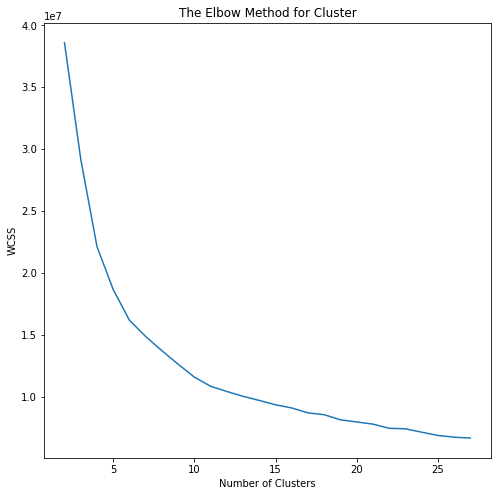

In [19]:
#Use KMean clustering to create new features before applying Naive Bayes
#Use elbow method to get the optimal number of clusters
wcss=[]

for i in range(2,28):
    cls=KMeans(n_clusters=i, init='k-means++',random_state=5)
    cls.fit(X)
    wcss.append(cls.inertia_)


f,ax=plt.subplots(figsize=(8,8))
plt.subplot(1,1,1)
plt.plot(range(2,28),wcss)
plt.title('The Elbow Method for Cluster')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [20]:
#Use n=10 clusters to do KMean clustering
cls=KMeans(n_clusters=10, init='k-means++',random_state=1)
cls.fit(X_train)
#Append the new cluster feature column to spase matrix
X_train_new = scipy.sparse.hstack((X_train, cls.predict(X_train)[:,None])).A 
X_test_new = scipy.sparse.hstack((X_test, cls.predict(X_test)[:,None])).A
X_train_new.shape

(7776, 89892)

In [21]:
#Use X_new to fit Naive Bayes model
NBclassifier = MultinomialNB().fit(X_train_new, y_train)
pred_cluster = NBclassifier.predict(X_test_new)

In [22]:
print(classification_report(y_test, pred_cluster))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_cluster))
print('\n')
print('Accuracy: \n', accuracy_score(y_test, pred_cluster))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1421
           1       0.99      0.94      0.96       524

    accuracy                           0.98      1945
   macro avg       0.98      0.97      0.98      1945
weighted avg       0.98      0.98      0.98      1945



Confusion Matrix: 
 [[1416    5]
 [  31  493]]


Accuracy: 
 0.9814910025706941


### End of the case study

In [42]:
#Use KNN clustering
knn = KNeighborsClassifier().fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [43]:
print(classification_report(y_test, pred_knn))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_knn))
print('\n')
print('Accuracy: \n', accuracy_score(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1421
           1       0.85      0.89      0.87       524

    accuracy                           0.93      1945
   macro avg       0.91      0.92      0.91      1945
weighted avg       0.93      0.93      0.93      1945



Confusion Matrix: 
 [[1339   82]
 [  56  468]]


Accuracy: 
 0.9290488431876607


In [50]:
#Use TFIDFvectorizer
X= TfidfVectorizer(analyzer='word', stop_words='english').fit_transform(mail_all['content'])
y= mail_all['classify']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True, test_size=0.2, stratify=y)

In [52]:
NBclassifier = MultinomialNB().fit(X_train, y_train)
pred = NBclassifier.predict(X_test)

In [53]:
print(classification_report(y_test, pred))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print('\n')
print('Accuracy: \n', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1421
           1       1.00      0.75      0.86       524

    accuracy                           0.93      1945
   macro avg       0.96      0.88      0.91      1945
weighted avg       0.94      0.93      0.93      1945



Confusion Matrix: 
 [[1421    0]
 [ 130  394]]


Accuracy: 
 0.9331619537275064


In [54]:
knn = KNeighborsClassifier().fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [55]:
print(classification_report(y_test, pred_knn))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_knn))
print('\n')
print('Accuracy: \n', accuracy_score(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1421
           1       0.66      0.82      0.73       524

    accuracy                           0.84      1945
   macro avg       0.79      0.83      0.81      1945
weighted avg       0.86      0.84      0.84      1945



Confusion Matrix: 
 [[1195  226]
 [  92  432]]


Accuracy: 
 0.8365038560411311
